# **EE613 Machine Learning for Engineers**

**Decision Trees Lab**<br>
Dr. Jean-Marc Odobez and Dr. Michael Villamizar<br>
Idiap Research Institute<br>
2019


# **Part 1: 2D Synthetic Dataset**

This laboratory notebook describes the 2D synthetic dataset used to study decision trees for the problem of classifying different classes in a two-dimensional feature space. In this notebook you will learn how to load and handle these synthetic datasets. If you want, you can insert solution and answers in the <span style="color:red">**student report**</span> file (***./report.doc***) provided for convenience.

In [1]:
# Import libraries.
from __future__ import print_function
import sys
import numpy as np

# Own libraries.
sys.path.append('../lib/')
import widgets as widgets
import synthetic_dataset_2d as synth_dataset
import test_exercises as tests

## **1. Load Dataset**

The dataset has four synthetic scenarios with different degree of difficulty. The first three scenarios correspond to two-class classification problems while the last one is a multi-class classification problem with four classes. For every scenario each sample is a 2D feature vector [f0, f1] in a two-dimensional feature space. The code to load and visualize the dataset is found at [/lib/synthetic_dataset_2d.py](../lib/synthetic_dataset_2d.py) file.

The following function allows to load a synthetic dataset according to different parameters. By default, the function loads the training set of the synthetic scenario 1 with 200 samples per class  and a noise factor of 1.0. The function returns a Python dictionary containing the dataset samples, the corresponding labels, and the number of classes.

```python
# Load dataset.
def load_dataset(scenario=1, num_samples=[100,100,100,100], noise=1.0, data='train'):
    """ This function loads a 2D synthetic dataset.

    Parameters:
    + scenario (int): Synthetic scenario index [1-4] 
        (default: scenario 1).
    + num_samples (int list): List with the number of 
        samples per class (default: 100 samples per class).
    + noise (float): Noise factor (default: 1.0 factor).
    + data (string): String flag for loading the training
        (train) or test (test) data (default: train data).

    Returns:
    + dataset (dict): Dictionary containing the dataset with the 
        following data:
        * samples (Numpy ndarray): 2xM array with the samples 
            (2D points), being M the number of samples.
        * labels (Numpy ndarray): 1xM array with the class labels
            for all samples. Labels are numbers in the range 
            [1, N], being N the number of classes.
        * num_classes (int): The number of classes for the
            selected scenario.
    """
```

The next function allows to show the samples of the loaded dataset in the 2D feature space. Class labels are represented by different colors.

```python
# Show samples.
def show_samples(dataset):
    """ This function shows the dataset samples in the 2D feature 
    space.

    Parameters:
    + dataset (dict): Dictionary containing the dataset with the 
        following data:
        * samples (Numpy ndarray): 2xM array with the samples 
            (2D points), being M the number of samples.
        * labels (Numpy ndarray): 1xM array with the class labels
            for all samples. Labels are numbers in the range 
            [1, N], being N the number of classes.
        * num_classes (int): The number of classes for the
            selected scenario.

    Returns:
        None
    """
```

As an example, run the next cell to load the default dataset and print its data format.

In [2]:
# Load default synthetic dataset.
dataset = synth_dataset.load_dataset()

# Data
print ('Synthetic Dataset:')
print ('+ Samples -size-: ', dataset['samples'].shape)
print ('+ Labels -size-: ', dataset['labels'].shape)
print ('+ Num. classes: ', dataset['num_classes'])

Synthetic Dataset:
+ Samples -size-:  (2, 200)
+ Labels -size-:  (1, 200)
+ Num. classes:  2


The next function shows the samples of the loaded dataset in the 2D feature space.

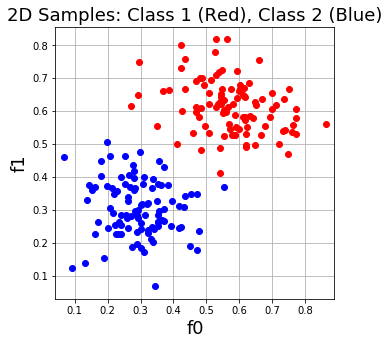

In [3]:
# Show dataset samples.
synth_dataset.show_samples(dataset)

## **2. Scenarios**
Next, the four synthetic scenarios will be loaded and shown.

### **2.1 Scenario 1**

The first synthetic scenario is a two-class problem consisting of two -unimodal- Gaussian distributions. The Gaussian parameters (mean and covariance matrix) for both classes are:

```python
mean_c1 = (0.6, 0.6)
mean_c2 = (0.3, 0.3)
cov_c1 = k*[[0.015, -0.005], [-0.005, 0.009]]
cov_c2 = k*[[0.007, 0], [0, 0.007]]
```
Wheke $k$ denotes the noise factor that scales the covariance matrices. A larger value results in more dispersed classes. 


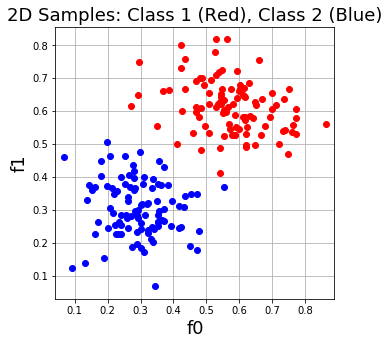

In [4]:
# Load 2D synthetic dataset.
dataset = synth_dataset.load_dataset(scenario=1)

# Show samples.
synth_dataset.show_samples(dataset)

### **2.2 Scenario 2**

The second scenario has two classes with a spiral layout. Each spiral arm is built using the next piece of code to get the features [f0,f1] for evey sample in such spiral arm:

```python
f0 = np.sin(theta)*theta + rnd.random((1, num_samples))*k*2.0
f1 = np.cos(theta)*theta + rnd.random((1, num_samples))*k*2.0
```

where $k$ corresponds to the noise factor to widen each spiral arm, and $\theta$ is the angle range that defines the lenght of the spiral.


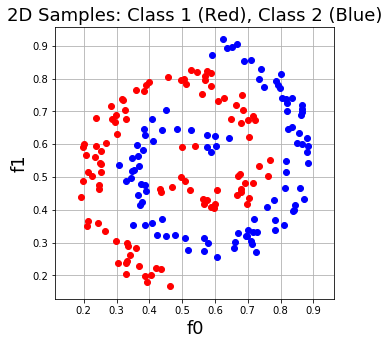

In [5]:
# Load 2D synthetic dataset.
dataset = synth_dataset.load_dataset(scenario=2)

# Show samples.
synth_dataset.show_samples(dataset)

### **2.3 Scenario 3**

The third scenario also corresponds a two-class sample distributions with a non-linear layout. The first class is a random uniform distribution inside a circle. The second class is also a random uniform distribution spread over the feature space but out of the circle (first class). The center position and radius of the circle are [0.5, 0.5] and 0.2 respectively. The noise factor controls the number of samples that violates the corresponding class area (eg. blue points falling inside the circle).


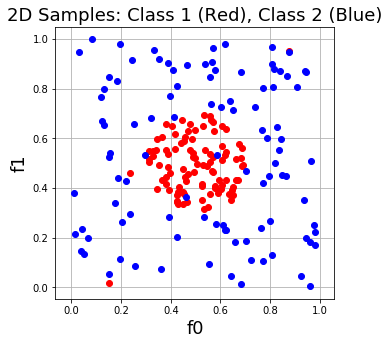

In [6]:
# Load 2D synthetic dataset.
dataset = synth_dataset.load_dataset(scenario=3)

# Show samples.
synth_dataset.show_samples(dataset)

### **2.4 Scenario 4**

While the previous scenarios are focused on binary classificiation problems (two classes), the fourth synthetic scenario corresponds to a multi-class classification problem with four different Gaussian distributions. The parameters of these distributions are:

```python
mean_c1 = (0.25, 0.3)
mean_c2 = (0.75, 0.75)
mean_c3 = (0.4, 0.58)
mean_c4 = (0.7, 0.25)
cov_c1 = k*[[0.0045, 0.000], [0.000, 0.0035]]
cov_c2 = k*[[0.0045, 0.000], [0.000, 0.0045]]
cov_c3 = k*[[0.012, -0.005], [-0.005, 0.003]]
cov_c4 = k*[[0.004, 0.000], [0.000, 0.004]]
```
Wheke $k$ denotes the noise factor that scales the covariance matrices.

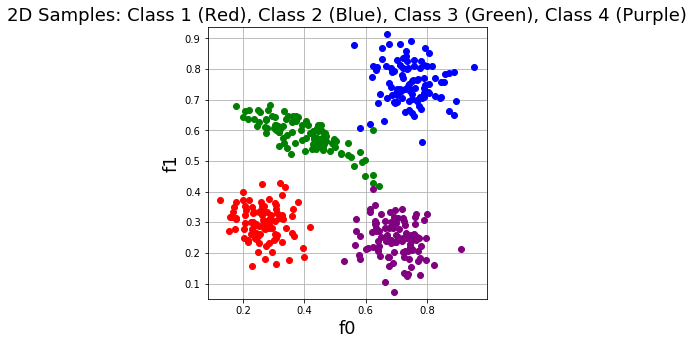

In [7]:
# Load 2D synthetic dataset.
dataset = synth_dataset.load_dataset(scenario=4)

# Show samples.
synth_dataset.show_samples(dataset)

## **3. Exercises**

Two exercises are given below in order that you get familiarized with the dataset and the data format.

### **3.1 Exercise 1: Load dataset**

Complete the code below to load the training data of the fourth scenario having 300, 50, 100 and 500 samples for the four classes respectively. Set the noise factor to 0.5.

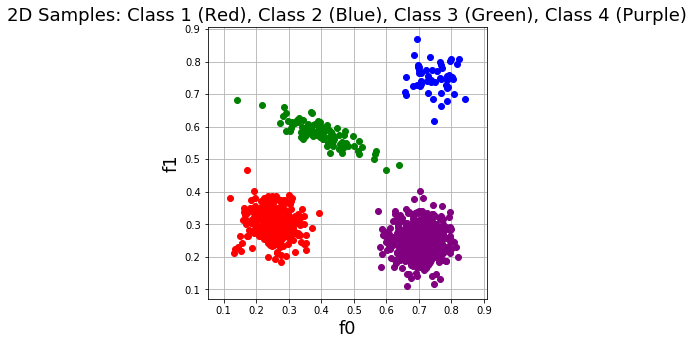

In [10]:
#================================================
# TODO: Comple the next line to load the dataset.
dataset = synth_dataset.load_dataset(scenario=4, num_samples=[300,50,100,500], noise=0.5,)
#================================================

# Show samples.
synth_dataset.show_samples(dataset)

#### **Test your exercise**
Run the cell below to test your exercise.

In [11]:
# Test implementation.
tests.test_load_dataset(dataset)

Checking exercise
>> Checking the number of classes ...  ok
>> Checking the number of samples for class 1 ...  ok
>> Checking the number of samples for class 2 ...  ok
>> Checking the number of samples for class 3 ...  ok
>> Checking the number of samples for class 4 ...  ok
>> Checking noise for class 1 ...  ok
>> Checking noise for class 2 ...  ok
>> Checking noise for class 3 ...  ok
>> Checking noise for class 4 ...  ok
The exercise is correct. Well done !!!


### **3.2 Exercise 2:  Mean and standard deviation**
Complete the next function to calculate the mean and standard deviation for every class of the loaded dataset in exercise 1. The mean and standard deviation must be 2D vectors. 

***Hint***: Use the Numpy functions np.mean() and np.std().

In [70]:
# Class mean and standard deviation.
def class_mean_std(samples, labels, class_index):
    """ This function computes the mean and standard deviation for 
    the input class index.
    
    Parameters:
    + samples (Numpy ndarray): 2xM array with the samples 
        (2D points), being M the number of samples.
    + labels (Numpy ndarray): 1xM array with the class labels for 
        all samples. Labels are numbers in the range [1, N], being 
        N the number of classes.
    + class_index (int): Class index. Number in the range [1, N], 
        being N the number of classes.
            
    Returns:
    + mean (Numpy ndarray): 2D mean vector.
    + std (Numpy ndarray): 2D standard deviation vector.
    
    """
    
    # Class indexes.
    indexes = labels[0,:]==class_index
    print(indexes)
    print(np.size(indexes))
    #===================================================
    # TODO: Complete the next lines to calculate the mean
    # and standard deviation for current class index. 
    # Use the class indexes.
    samples[:,indexes];

    #print(samples_class)
    mean = np.mean(samples)
    std = np.std(samples)
    #===================================================
        
    return mean, std

#### **Test your exercise**

Run the cell below to test your exercise.

In [71]:
# Test implementation
tests.test_mean_std(class_mean_std, dataset)

[False False False  True False  True False False False False  True False
  True False False  True False False  True False  True False False  True
 False False False False  True False False  True False False False  True
 False False False False False  True False  True  True False  True False
 False False  True False False  True False False False  True False False
 False False False False  True False  True  True  True False False False
 False False False  True False False False False False False False  True
  True False False  True False  True False False False False False False
 False False False False False False False  True False  True False  True
  True  True False False False  True False False False  True False  True
  True False  True False  True  True  True  True False False False  True
 False False False  True False  True False  True  True False False False
 False False False  True False False False False False False  True False
 False  True  True False False False False False  T

ValueError: operands could not be broadcast together with shapes (4,) (4,2) 

Run the next cell to compute the mean and standard deviation for all classes.

In [12]:
# Compute mean and standard deviation for all classes.
for c in range(dataset['num_classes']):
    mean, std = class_mean_std(dataset['samples'], dataset['labels'], c+1)
    print ('Class {}:'.format(c+1) + ' mean:[{0:.2f} {1:.2f}]'.format(mean[0],mean[1]) + \
           ' std:[{0:.2f} {1:.2f}]'.format(std[0], std[1]))   

Class 1: mean:[0.25 0.30] std:[0.05 0.04]
Class 2: mean:[0.75 0.75] std:[0.05 0.04]
Class 3: mean:[0.40 0.58] std:[0.08 0.04]
Class 4: mean:[0.70 0.25] std:[0.05 0.05]


## **4. Playground**

The next code generates the training and test sample sets with different settings. You can play using the following widgets to set the scenario, the number of samples, and the noise factor.

ToggleButtons(description='Scenario', options=('2D Clusters', '2D Spirals', '2D Circle', '2D Multi-clusters'),…

IntSlider(value=200, description='C1 samples', layout=Layout(height='50px', width='500px'), max=2000, min=10, …

IntSlider(value=200, description='C2 samples', layout=Layout(height='50px', width='500px'), max=2000, min=10, …

FloatSlider(value=1.0, description='Noise', layout=Layout(height='50px', width='500px'), max=5.0, min=0.1)

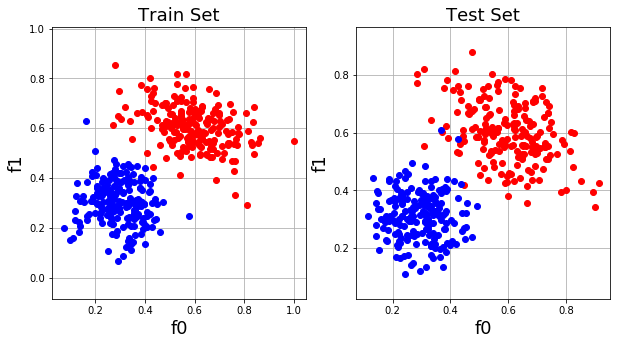

In [13]:
# Set the dataset scenario, number of samples, and noise factor.
scenario, num_samples, noise = widgets.synth_dataset_parameters()

# Load 2D synthetic dataset: train and test sets.
train_dataset = synth_dataset.load_dataset(scenario, num_samples, noise, data='train')
test_dataset = synth_dataset.load_dataset(scenario, num_samples, noise, data='test')

# Show 2D samples for train and test sets.
synth_dataset.show_samples_sets(train_dataset, test_dataset)

Finally, the mean and standard values are computed for the training set of the loaded dataset.

In [14]:
# Compute mean and standard deviation for all classes.
for c in range(train_dataset['num_classes']):
    mean, std = class_mean_std(train_dataset['samples'], train_dataset['labels'], c+1)
    print ('Class {}:'.format(c+1) + ' mean:[{0:.2f} {1:.2f}]'.format(mean[0],mean[1]) + \
           ' std:[{0:.2f} {1:.2f}]'.format(std[0], std[1]))   

Class 1: mean:[0.59 0.61] std:[0.12 0.09]
Class 2: mean:[0.30 0.30] std:[0.08 0.09]
